In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch 
import torch.optim as optim
from torch.utils.data import Dataset, Subset
from torch.utils.data import random_split
from PIL import Image
import os
import numpy as np

In [43]:
transformation = transforms.Compose( [transforms.Resize((32,32)), 
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                          std=[0.5, 0.5, 0.5])])

#change average sizes
#grabbing dataset
dataset = torchvision.datasets.ImageFolder('dataset', 
                                                transform=transformation)

#randomly splitting for training and testing
training_set, testing_set = random_split(dataset, [2328, 998])


                                                
train_loader = torch.utils.data.DataLoader(training_set, batch_size=100, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=100, shuffle=True, num_workers=2)


In [35]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = self.linear(x)
        return x

model = LogisticRegression(input_size=3072, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(30):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.view(-1, 3072)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/100], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 3072)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test set: {100 * correct / total} %')

Accuracy of the model on the test set: 36.17788461538461 %


In [39]:
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td


#building neural network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
        self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(8 * 8 * 64, 1000),
        nn.ReLU(inplace=True),
        nn.Linear(1000, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(512, 10)
    )
    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)
        return x


In [40]:
num_epochs = 12
num_classes = 10
learning_rate = 0.0008

In [41]:
#initializing CNN
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)

In [42]:
start = time.perf_counter()
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
        .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
        (correct / total) * 100))
end = time.perf_counter()
print(f"{round(end-start,2)} seconds")

Epoch [1/13], Step [25/25], Loss: 1.6439, Accuracy: 37.23%
Epoch [2/13], Step [25/25], Loss: 1.5429, Accuracy: 36.17%
Epoch [3/13], Step [25/25], Loss: 1.4478, Accuracy: 47.87%
Epoch [4/13], Step [25/25], Loss: 1.2059, Accuracy: 58.51%
Epoch [5/13], Step [25/25], Loss: 1.1956, Accuracy: 56.38%
Epoch [6/13], Step [25/25], Loss: 0.9273, Accuracy: 70.21%
Epoch [7/13], Step [25/25], Loss: 0.7553, Accuracy: 70.21%
Epoch [8/13], Step [25/25], Loss: 0.8565, Accuracy: 65.96%
Epoch [9/13], Step [25/25], Loss: 0.9285, Accuracy: 70.21%
Epoch [10/13], Step [25/25], Loss: 0.6122, Accuracy: 81.91%
Epoch [11/13], Step [25/25], Loss: 0.4659, Accuracy: 81.91%
Epoch [12/13], Step [25/25], Loss: 0.4130, Accuracy: 87.23%
Epoch [13/13], Step [25/25], Loss: 0.4446, Accuracy: 84.04%
104.52 seconds


In [10]:
#Saving Model
# path = r"/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/Models/Model2.pt"

# torch.save(model.state_dict(), path)

In [12]:
#testing the model after it has beeen trained
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 800 test images: {} %'
          .format((correct / total) * 100))

Test Accuracy of the model on the 800 test images: 57.99999999999999 %
Test Accuracy of the model on the 800 test images: 62.5 %
Test Accuracy of the model on the 800 test images: 63.0 %
Test Accuracy of the model on the 800 test images: 62.74999999999999 %
Test Accuracy of the model on the 800 test images: 63.6 %
Test Accuracy of the model on the 800 test images: 63.33333333333333 %
Test Accuracy of the model on the 800 test images: 62.71428571428571 %
Test Accuracy of the model on the 800 test images: 62.74999999999999 %
Test Accuracy of the model on the 800 test images: 63.10096153846154 %


Time to evaluate our data.
First will be the training data.


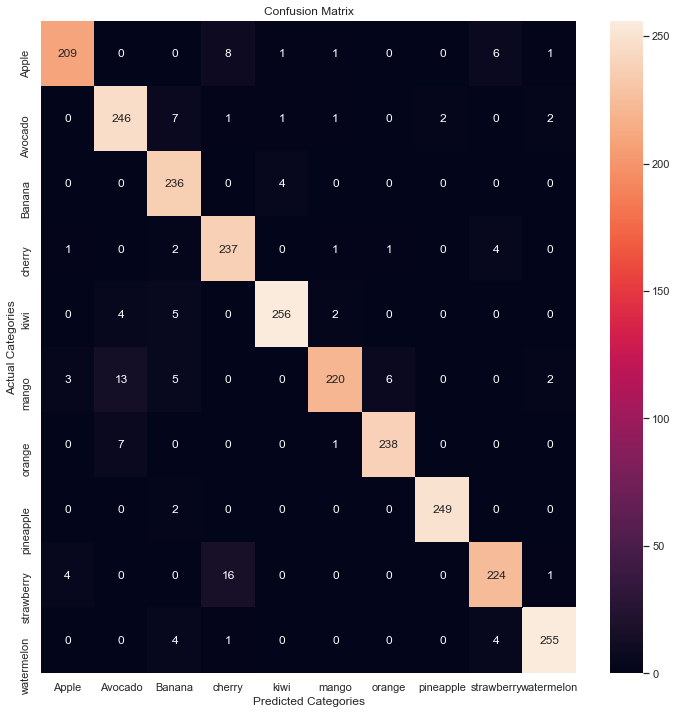

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       217
           1       0.95      0.91      0.93       270
           2       0.98      0.90      0.94       261
           3       0.96      0.90      0.93       263
           4       0.96      0.98      0.97       262
           5       0.88      0.97      0.93       226
           6       0.97      0.97      0.97       245
           7       0.99      0.99      0.99       251
           8       0.91      0.94      0.93       238
           9       0.97      0.98      0.97       261

    accuracy                           0.95      2494
   macro avg       0.95      0.95      0.95      2494
weighted avg       0.95      0.95      0.95      2494



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

print("Time to evaluate our data.")
print("First will be the training data.")

#building Confusion Matrix as well as getting accuracy, predictions and F1 score for train model
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())
        
sns.set(rc={'figure.figsize':(12,12)})
confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])
confusionMatrix.yaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])


plt.show()

#printing Accuracy, Prediction and F1 score for training model
print(classification_report(prediction_list, accurate_list))

Now to evaluate the testing data.


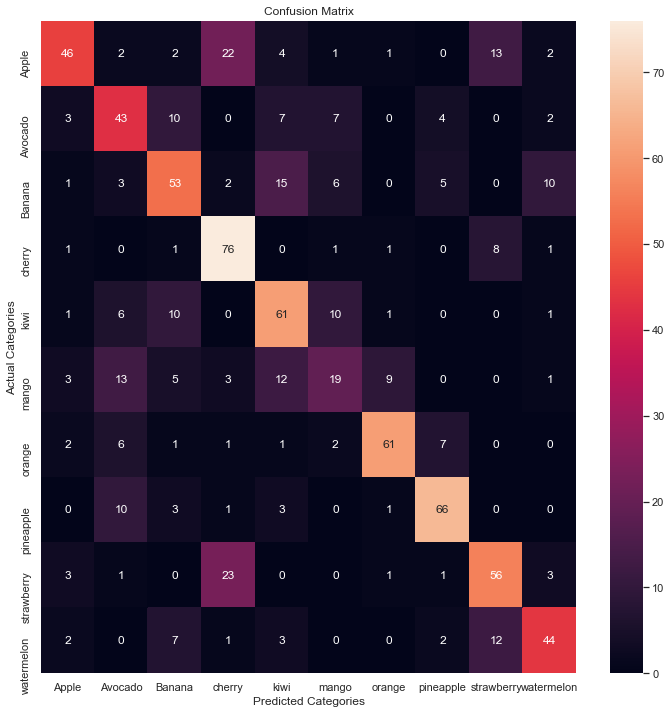

              precision    recall  f1-score   support

           0       0.49      0.74      0.59        62
           1       0.57      0.51      0.54        84
           2       0.56      0.58      0.57        92
           3       0.85      0.59      0.70       129
           4       0.68      0.58      0.62       106
           5       0.29      0.41      0.34        46
           6       0.75      0.81      0.78        75
           7       0.79      0.78      0.78        85
           8       0.64      0.63      0.63        89
           9       0.62      0.69      0.65        64

    accuracy                           0.63       832
   macro avg       0.62      0.63      0.62       832
weighted avg       0.65      0.63      0.64       832



In [14]:
#building Confusion Matrix as well as getting accuracy, predictions and F1 score for test model

print("Now to evaluate the testing data.")
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())

sns.set(rc={'figure.figsize':(12,12)})

confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])
confusionMatrix.yaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])

  
plt.show()

#printing Accuracy, Prediction and F1 score for testing model
print(classification_report(prediction_list, accurate_list))